In [1]:
# Import packages to use
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'errorbar.capsize': 2})

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
d4={'lf':[0.5,1.0,2.0,4.0,8.0],
    'const':[4.342145,3.914800,3.489700,3.027501,2.580114],
    'error':[0.049842,0.060580,0.077763,0.100276,0.124761]}
df4=pd.DataFrame(data=d4)

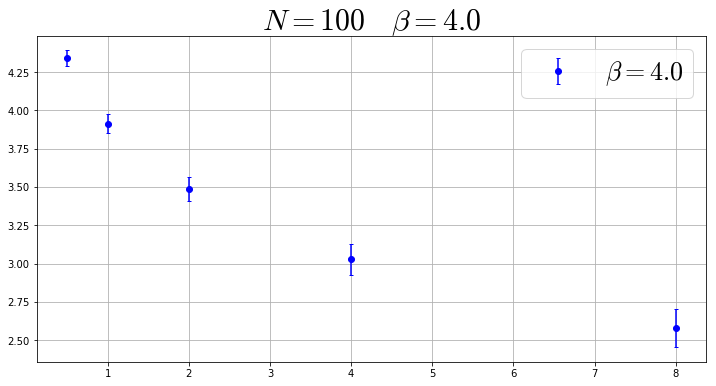

In [3]:
fig,ax=plt.subplots(figsize=(12,6))

plt.errorbar(df4.lf,df4.const,yerr=df4.error,fmt='o',color='blue',label=r'$\beta=4.0$')

ax.set_title(r'$N=100 \quad \beta=4.0$',fontsize=30)
ax.grid(zorder=3)
ax.legend(fontsize=26)

plt.show()
plt.close()

In [4]:
d3={'lf':[0.5,1.0,2.0,4.0,8.0],
    'const':[3.728035,3.423938,3.003999,2.605562,2.214823],
    'error':[0.076518,0.084105,0.112872,0.140516,0.174095]}
df3=pd.DataFrame(data=d3)

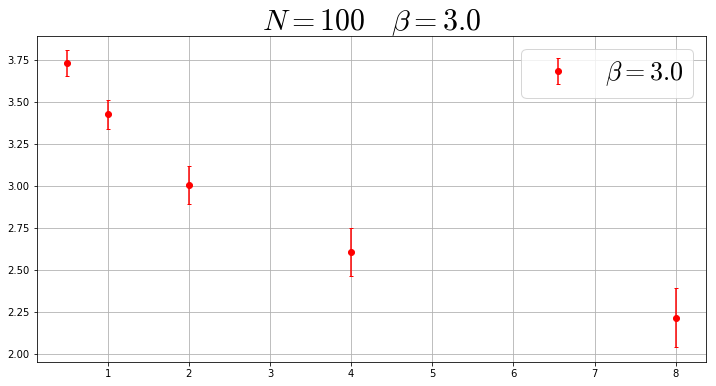

In [5]:
fig,ax=plt.subplots(figsize=(12,6))

plt.errorbar(df3.lf,df3.const,yerr=df3.error,fmt='o',color='red',label=r'$\beta=3.0$')

ax.set_title(r'$N=100 \quad \beta=3.0$',fontsize=30)
ax.grid(zorder=3)
ax.legend(fontsize=26)

plt.show()
plt.close()

In [6]:
d2={'lf':[0.5,1.0,2.0,4.0,8.0],
    'const':[2.888652,2.569234,2.268374,1.967463,1.674683],
    'error':[0.129008,0.157031,0.184075,0.226660,0.259832]}
df2=pd.DataFrame(data=d2)

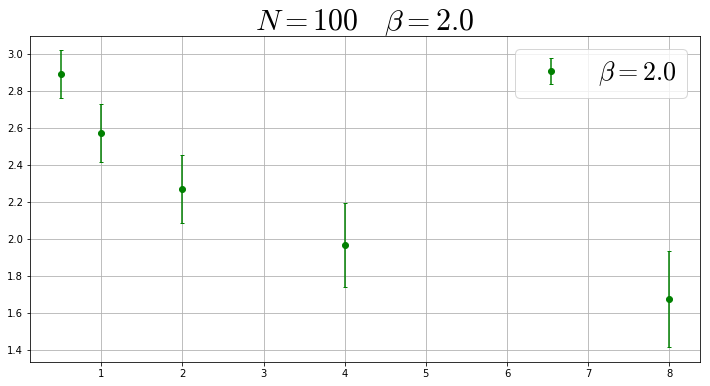

In [7]:
fig,ax=plt.subplots(figsize=(12,6))

plt.errorbar(df2.lf,df2.const,yerr=df2.error,fmt='o',color='green',label=r'$\beta=2.0$')

ax.set_title(r'$N=100 \quad \beta=2.0$',fontsize=30)
ax.grid(zorder=3)
ax.legend(fontsize=26)

plt.show()
plt.close()

In [8]:
d1={'lf':[0.5,1.0,2.0,4.0,8.0],
    'const':[1.226725,1.129510,1.073945,0.953789,0.811294],
    'error':[0.325571,0.363219,0.389868,0.414477,0.453734]}
df1=pd.DataFrame(data=d1)

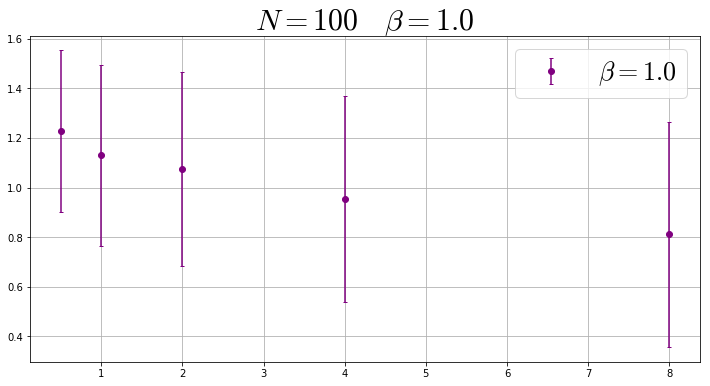

In [9]:
fig,ax=plt.subplots(figsize=(12,6))

plt.errorbar(df1.lf,df1.const,yerr=df1.error,fmt='o',color='purple',label=r'$\beta=1.0$')

ax.set_title(r'$N=100 \quad \beta=1.0$',fontsize=30)
ax.grid(zorder=3)
ax.legend(fontsize=26)

plt.show()
plt.close()

In [10]:
# Perform fit of the form y=ax+b
# Define function to calculate a,b,err_a,err_b
def regression(x,y,err_y):
    n=len(x)
    xiyi=np.sum(np.multiply(x,y))
    xi=np.sum(x)
    yj=np.sum(y)
    xi2=np.sum(np.square(x))
    xidyi=np.sum(np.multiply(x,err_y))
    dyj=np.sum(err_y)
    den=n*xi2-xi**2
    
    a=(n*xiyi-xi*yj)/den
    b=(xi2*yj-xi*xiyi)/den
    err_a=(n*xidyi-xi*dyj)/den
    err_b=(xi2*dyj-xi*xidyi)/den
    
    return a,b,err_a,err_b

In [11]:
m1,b1,ea1,eb1=regression(np.log(df1.lf),df1.const,df1.error)
m2,b2,ea2,eb2=regression(np.log(df2.lf),df2.const,df2.error)
m3,b3,ea3,eb3=regression(np.log(df3.lf),df3.const,df3.error)
m4,b4,ea4,eb4=regression(np.log(df4.lf),df4.const,df4.error)

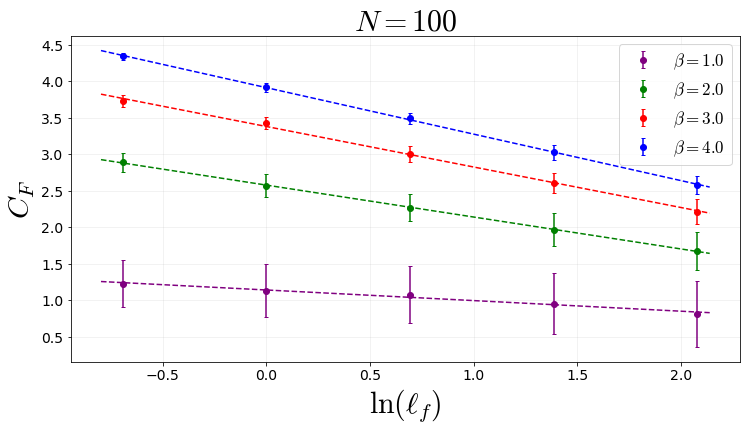

In [12]:
fig,ax=plt.subplots(figsize=(12,6))

xplot=np.log(np.linspace(0.45,8.5,1000))

ax.errorbar(np.log(df1.lf),df1.const,yerr=df1.error,fmt='o',color='purple',label=r'$\beta=1.0$')
yplot1=m1*xplot+b1
ax.plot(xplot,yplot1,color='purple',linestyle='dashed')

ax.errorbar(np.log(df2.lf),df2.const,yerr=df2.error,fmt='o',color='green',label=r'$\beta=2.0$')
yplot2=m2*xplot+b2
ax.plot(xplot,yplot2,color='green',linestyle='dashed')

ax.errorbar(np.log(df3.lf),df3.const,yerr=df3.error,fmt='o',color='red',label=r'$\beta=3.0$')
yplot3=m3*xplot+b3
ax.plot(xplot,yplot3,color='red',linestyle='dashed')

ax.errorbar(np.log(df4.lf),df4.const,yerr=df4.error,fmt='o',color='blue',label=r'$\beta=4.0$')
yplot4=m4*xplot+b4
ax.plot(xplot,yplot4,color='blue',linestyle='dashed')

#ax.set_xscale('log')
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
ax.ticklabel_format(style='plain',axis='y',useOffset=False)
ax.tick_params(axis='both', labelsize=14)

ax.set_xlabel(r'$\ln(\ell_f)$',fontsize=30)
ax.set_ylabel(r'$C_F$',fontsize=30)
ax.set_title(r'$N=100$',fontsize=30)
ax.grid(zorder=3,which='both',alpha=0.2)
ax.legend(fontsize=17,loc=1)

plt.show()
plt.close()

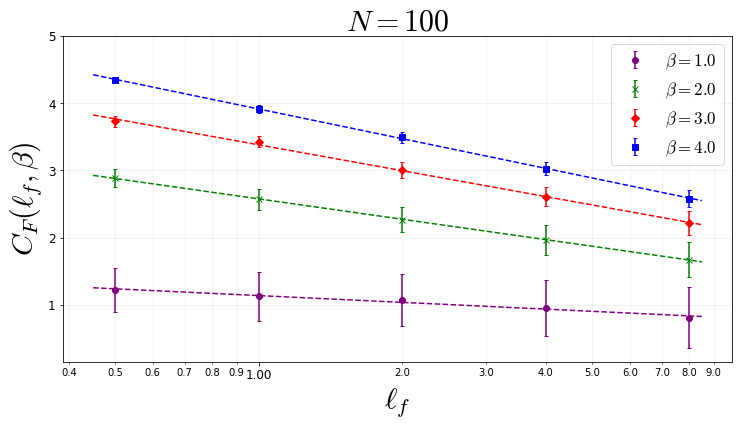

In [13]:
fig,ax=plt.subplots(figsize=(12,6))

xplot=np.log(np.linspace(0.45,8.5,1000))

ax.errorbar(df1.lf,df1.const,yerr=df1.error,fmt='o',color='purple',label=r'$\beta=1.0$')
yplot1=m1*xplot+b1
ax.plot(np.exp(xplot),yplot1,color='purple',linestyle='dashed')

ax.errorbar(df2.lf,df2.const,yerr=df2.error,fmt='x',color='green',label=r'$\beta=2.0$')
yplot2=m2*xplot+b2
ax.plot(np.exp(xplot),yplot2,color='green',linestyle='dashed')

ax.errorbar(df3.lf,df3.const,yerr=df3.error,fmt='D',color='red',label=r'$\beta=3.0$')
yplot3=m3*xplot+b3
ax.plot(np.exp(xplot),yplot3,color='red',linestyle='dashed')

ax.errorbar(df4.lf,df4.const,yerr=df4.error,fmt='s',color='blue',label=r'$\beta=4.0$')
yplot4=m4*xplot+b4
ax.plot(np.exp(xplot),yplot4,color='blue',linestyle='dashed')

ax.set_xscale('log')
ax.set_ylim(top=5)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
ax.ticklabel_format(style='plain',axis='y',useOffset=False)
ax.tick_params(axis='both', labelsize=12)

ax.set_xlabel(r'$\ell_f$',fontsize=30)
ax.set_ylabel(r'$C_F(\ell_f,\beta)$',fontsize=30)
ax.set_title(r'$N=100$',fontsize=30)
ax.grid(zorder=3,which='both',alpha=0.2)
ax.legend(fontsize=17,loc=1)

plt.show()
plt.close()

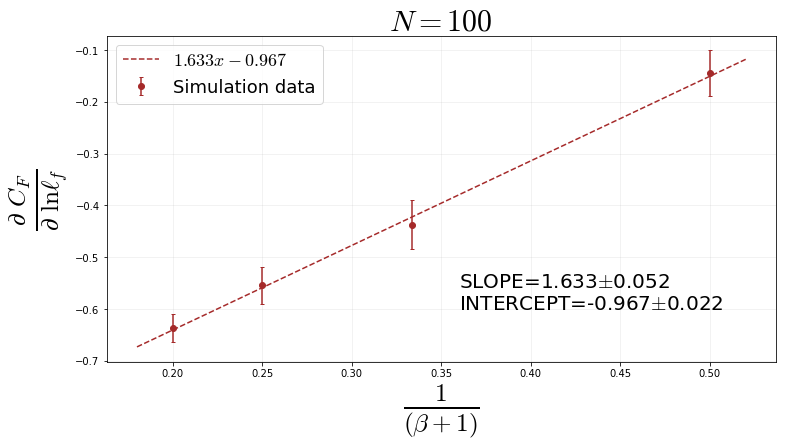

In [30]:
fig,ax=plt.subplots(figsize=(12,6))

binv=1/(np.array([1,2,3,4])+1)
slop=[m1,m2,m3,m4]
errr=1*np.array([ea1,ea2,ea3,ea4])

ax.errorbar(binv,slop,yerr=errr,fmt='o',label='Simulation data',color='brown')
aa,bb,eeaa,eebb=regression(binv,slop,errr)

ax.annotate('SLOPE=%.3f$\pm$%.3f \nINTERCEPT=%.3f$\pm$%.3f'%(aa,eeaa,bb,eebb),
            xy=(0.36,-0.6),fontsize=20)
xplot=np.linspace(0.18,0.52)
yplot=aa*xplot+bb
plt.plot(xplot,yplot,label='$% .3f x% .3f$'%(aa,bb),color='brown',linestyle='dashed')

ax.set_xlabel(r'$\frac{1}{(\beta+1)}$',fontsize=36)
ax.set_ylabel(r'$\frac{\partial \ C_F}{\partial \ \ln \ell_f}$',fontsize=36)
ax.set_title(r'$N=100$',fontsize=30)
ax.legend(fontsize=18)
ax.grid(zorder=3,which='both',alpha=0.2)

plt.show()
plt.close()

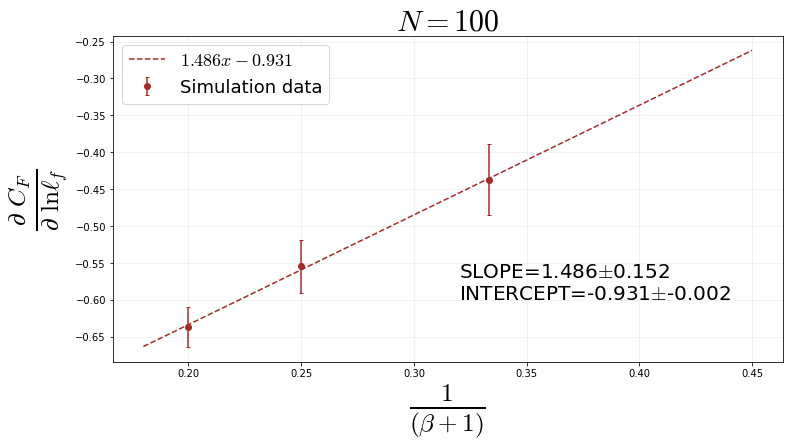

In [26]:
fig,ax=plt.subplots(figsize=(12,6))

binv=1/(np.array([2,3,4])+1)
slop=[m2,m3,m4]
errr=[ea2,ea3,ea4]

ax.errorbar(binv,slop,yerr=errr,fmt='o',label='Simulation data',color='brown')
aa,bb,eeaa,eebb=regression(binv,slop,errr)

ax.annotate('SLOPE=%.3f$\pm$%.3f \nINTERCEPT=%.3f$\pm$%.3f'%(aa,eeaa,bb,eebb),
            xy=(0.32,-0.6),fontsize=20)
xplot=np.linspace(0.18,0.45)
yplot=aa*xplot+bb
plt.plot(xplot,yplot,label='$% .3f x% .3f$'%(aa,bb),color='brown',linestyle='dashed')

ax.set_xlabel(r'$\frac{1}{(\beta+1)}$',fontsize=36)
ax.set_ylabel(r'$\frac{\partial \ C_F}{\partial \ \ln \ell_f}$',fontsize=36)
ax.set_title(r'$N=100$',fontsize=30)
ax.legend(fontsize=18)
ax.grid(zorder=3,which='both',alpha=0.2)

plt.show()
plt.close()

In [18]:
d05={'lf':[0.5,1.0,2.0,4.0,8.0],
    'const':[0.285949,0.244293,0.261064,0.238041,0.161513],
    'error':[0.491831,0.612509,0.599848,0.625214,0.700770]}
df05=pd.DataFrame(data=d05)
m05,b05,ea05,eb05=regression(np.log(df05.lf),df05.const,df05.error)

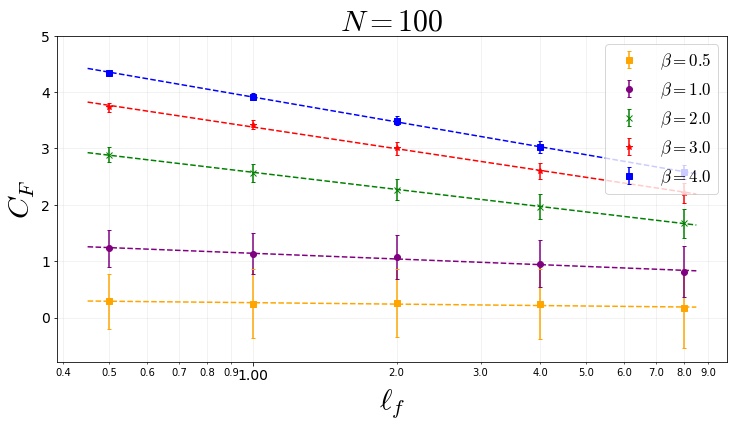

In [19]:
fig,ax=plt.subplots(figsize=(12,6))

xplot=np.log(np.linspace(0.45,8.5,1000))

ax.errorbar(df05.lf,df05.const,yerr=df05.error,fmt='s',color='orange',label=r'$\beta=0.5$')
yplot05=m05*xplot+b05
ax.plot(np.exp(xplot),yplot05,color='orange',linestyle='dashed')

ax.errorbar(df1.lf,df1.const,yerr=df1.error,fmt='o',color='purple',label=r'$\beta=1.0$')
yplot1=m1*xplot+b1
ax.plot(np.exp(xplot),yplot1,color='purple',linestyle='dashed')

ax.errorbar(df2.lf,df2.const,yerr=df2.error,fmt='x',color='green',label=r'$\beta=2.0$')
yplot2=m2*xplot+b2
ax.plot(np.exp(xplot),yplot2,color='green',linestyle='dashed')

ax.errorbar(df3.lf,df3.const,yerr=df3.error,fmt='*',color='red',label=r'$\beta=3.0$')
yplot3=m3*xplot+b3
ax.plot(np.exp(xplot),yplot3,color='red',linestyle='dashed')

ax.errorbar(df4.lf,df4.const,yerr=df4.error,fmt='s',color='blue',label=r'$\beta=4.0$')
yplot4=m4*xplot+b4
ax.plot(np.exp(xplot),yplot4,color='blue',linestyle='dashed')

ax.set_xscale('log')
ax.set_ylim(top=5)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
ax.ticklabel_format(style='plain',axis='y',useOffset=False)
ax.tick_params(axis='both', labelsize=14)

ax.set_xlabel(r'$\ell_f$',fontsize=30)
ax.set_ylabel(r'$C_F$',fontsize=30)
ax.set_title(r'$N=100$',fontsize=30)
ax.grid(zorder=3,which='both',alpha=0.2)
ax.legend(fontsize=17,loc=1)

plt.show()
plt.close()

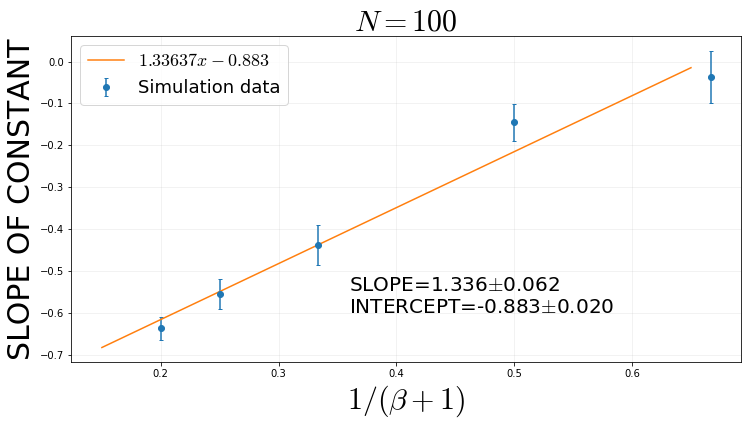

In [23]:
fig,ax=plt.subplots(figsize=(12,6))

binv=1/(np.array([0.5,1,2,3,4])+1)
slop=[m05,m1,m2,m3,m4]
errr=[ea05,ea1,ea2,ea3,ea4]

ax.errorbar(binv,slop,yerr=errr,fmt='o',label='Simulation data')
aa,bb,eeaa,eebb=regression(binv,slop,errr)
ax.annotate('SLOPE=%.3f$\pm$%.3f \nINTERCEPT=%.3f$\pm$%.3f'%(aa,eeaa,bb,eebb),
            xy=(0.36,-0.6),fontsize=20)

xplot=np.linspace(0.15,0.65)
yplot=aa*xplot+bb
plt.plot(xplot,yplot,label='$%.5fx%.3f$'%(aa,bb))

ax.set_xlabel(r'$1/(\beta+1)$',fontsize=30)
ax.set_ylabel(r'SLOPE OF CONSTANT',fontsize=30)
ax.set_title(r'$N=100$',fontsize=30)
ax.legend(fontsize=18)
ax.grid(zorder=3,which='both',alpha=0.2)

plt.show()
plt.close()